# Tech Workforce Insights

## 1. Introduction
### This notebook analyzes a global survey dataset of tech professionals to answer three key questions:
1. What factors contribute most to high salaries in tech?
2. Which regions have the highest demand for tech roles?
3. How do job satisfaction and career progression vary across demographics?

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# !pip install scikit-learn

In [3]:
# Load the dataset
survey_data = pd.read_csv("data/archive.zip_unzipped/survey_results_public.csv")

# Display the first few rows
survey_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Data Loading and Cleaning

In [4]:
# Check the structure of the data
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [5]:
# Handle missing values
# Remove columns with more than 90% missing data
missing_proportions = survey_data.isnull().mean()
cleaned_data = survey_data.loc[:, missing_proportions < 0.90]

In [6]:
# Fill missing values for numerical columns with the median
numerical_cols = cleaned_data.select_dtypes(
    include=['float64', 'int64']).columns
cleaned_data[numerical_cols] = cleaned_data[numerical_cols].fillna(
    cleaned_data[numerical_cols].median())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14416\168416854.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[numerical_cols] = cleaned_data[numerical_cols].fillna(


In [7]:
# Fill missing values for categorical columns with 'Unknown'
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
cleaned_data[categorical_cols] = cleaned_data[categorical_cols].fillna('Unknown')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14416\1609831899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[categorical_cols] = cleaned_data[categorical_cols].fillna('Unknown')


In [8]:
# Verify missing data is handled
cleaned_data.isnull().sum().sum()

0

# 3. Exploratory Data Analysis (EDA)

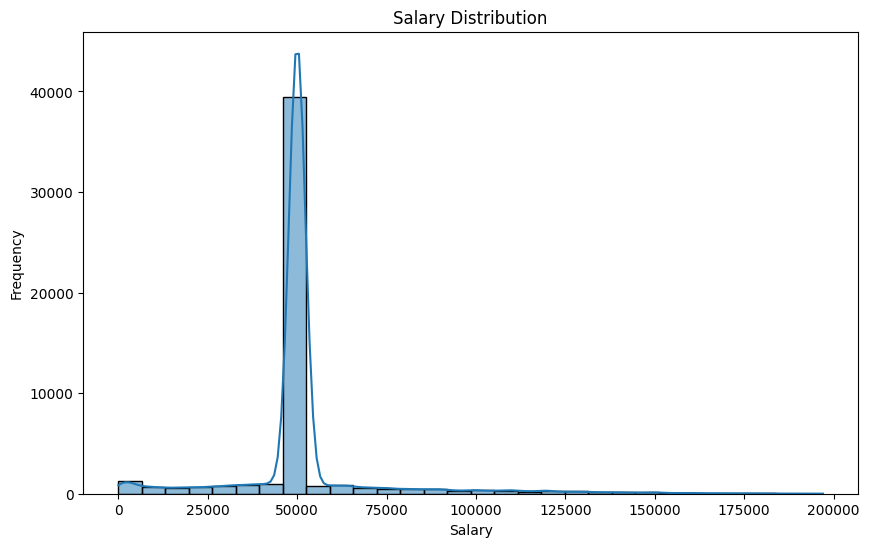

In [9]:
# Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

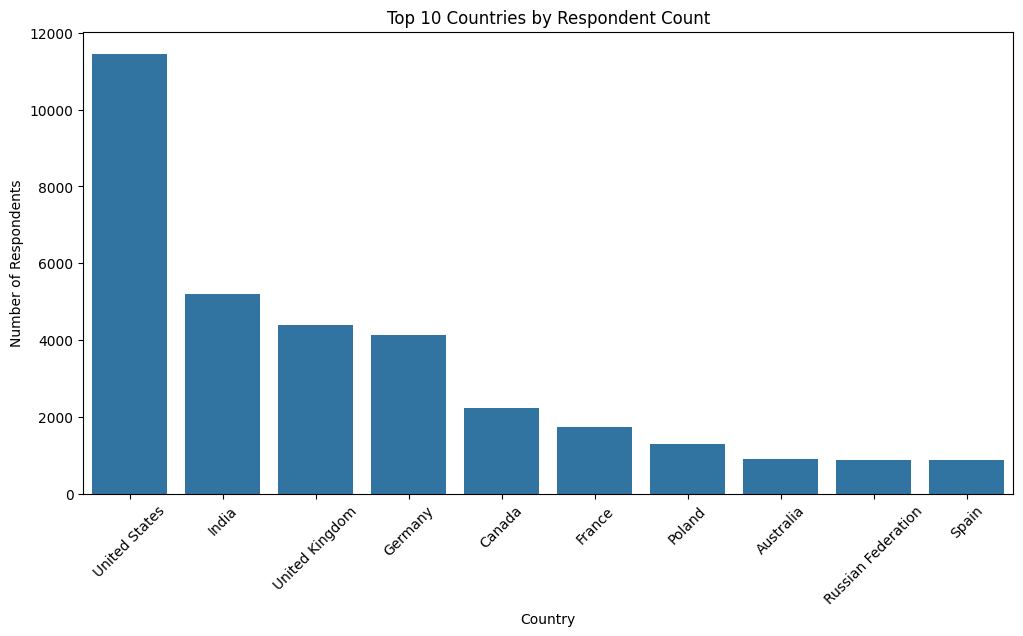

In [10]:
# Top 10 Countries by Respondents
top_countries = cleaned_data['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Respondent Count")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

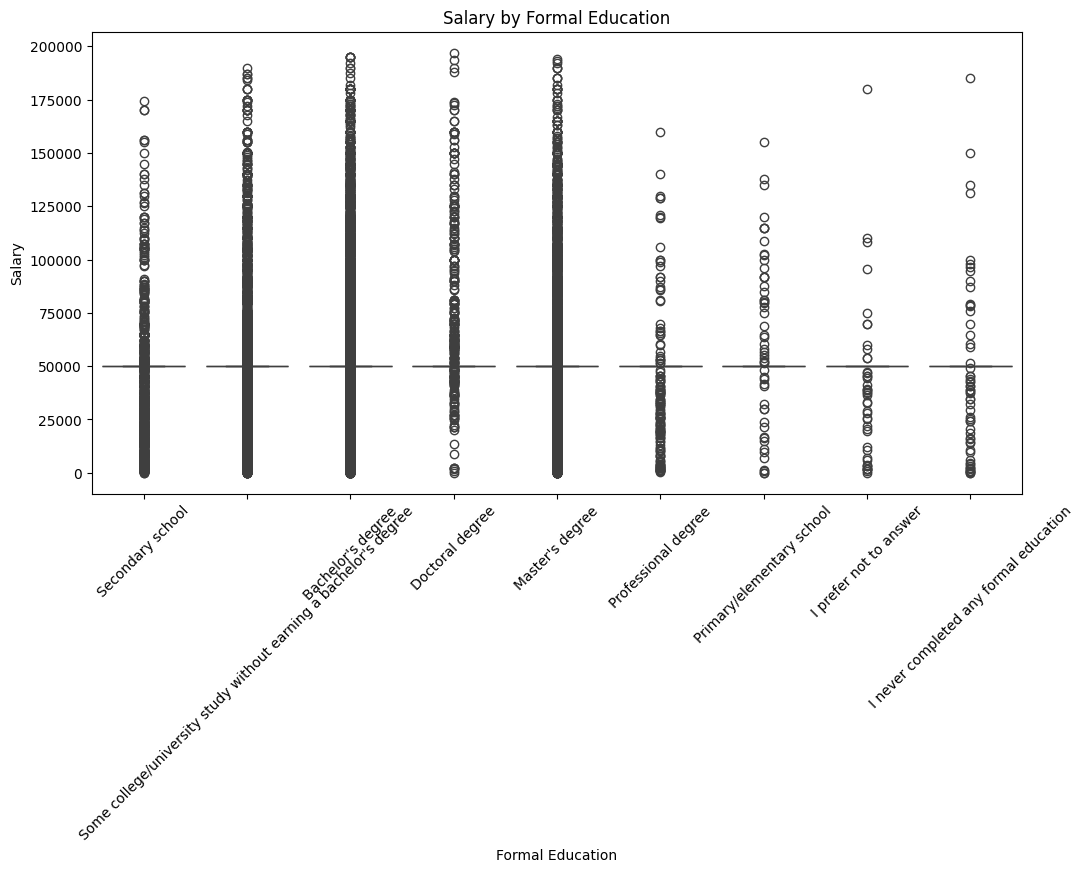

In [11]:
# Formal Education and Salary
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x="FormalEducation", y="Salary")
plt.title("Salary by Formal Education")
plt.xlabel("Formal Education")
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

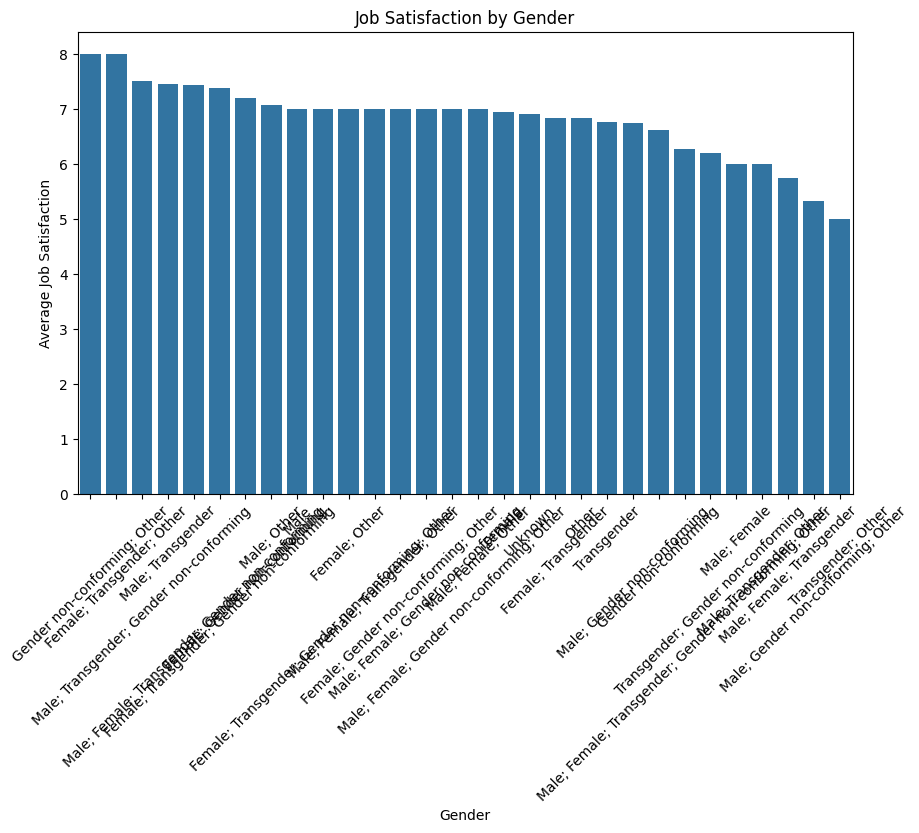

In [12]:
# Gender and Job Satisfaction Analysis

# Group by gender and calculate the mean job satisfaction score
gender_satisfaction = cleaned_data.groupby(
    'Gender')['JobSatisfaction'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_satisfaction.index, y=gender_satisfaction.values)
plt.title('Job Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Job Satisfaction')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.show()

In [13]:
# Print column names to check for typos or missing columns
cleaned_data.columns.to_list()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'DeveloperType',
 'WebDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeaders',
 'AssessJobProfDevel',
 'AssessJobDiversity',
 'AssessJobProduct',
 'AssessJobFinances

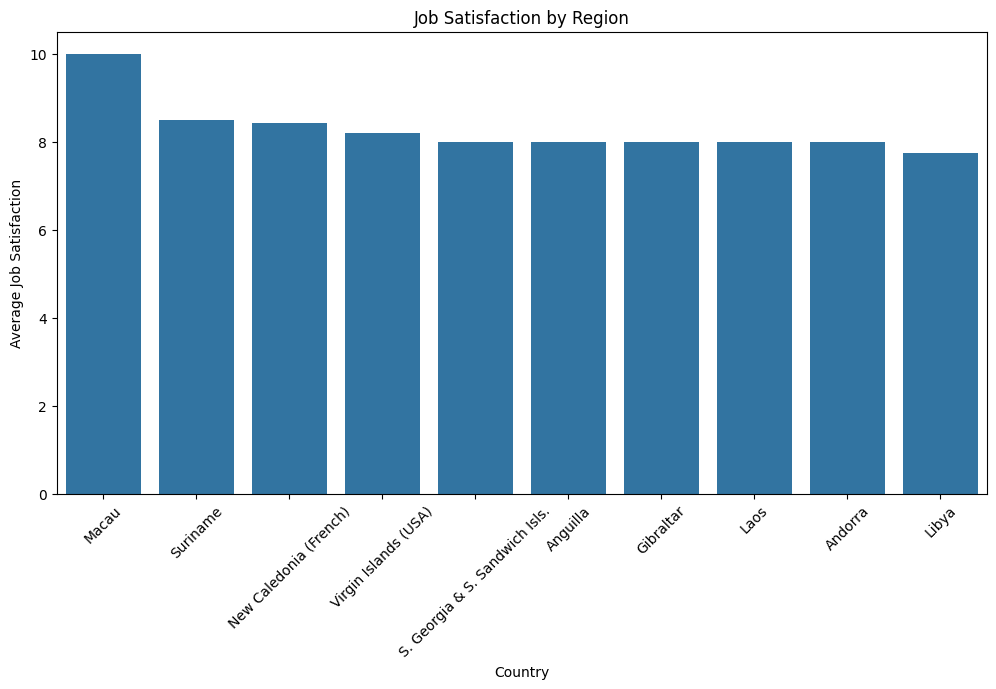

In [14]:
# Region and Job Satisfaction Analysis

# Group by country and calculate the mean job satisfaction score
region_satisfaction = cleaned_data.groupby(
    'Country')['JobSatisfaction'].mean().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=region_satisfaction.index, y=region_satisfaction.values)
plt.title('Job Satisfaction by Region')
plt.xlabel('Country')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

# 4. Modeling and Analysis
Salary Prediction with Random Forest

salary prediction with xgboost

In [15]:
# Encode categorical variables
encoder = LabelEncoder()
encoded_data = cleaned_data.copy()

for col in categorical_cols:
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

# Define features and target
features = encoded_data.drop(columns=["Salary"])
target = encoded_data["Salary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 147046931.54820186
R^2 Score: 0.6364613541096817


# 5. Results

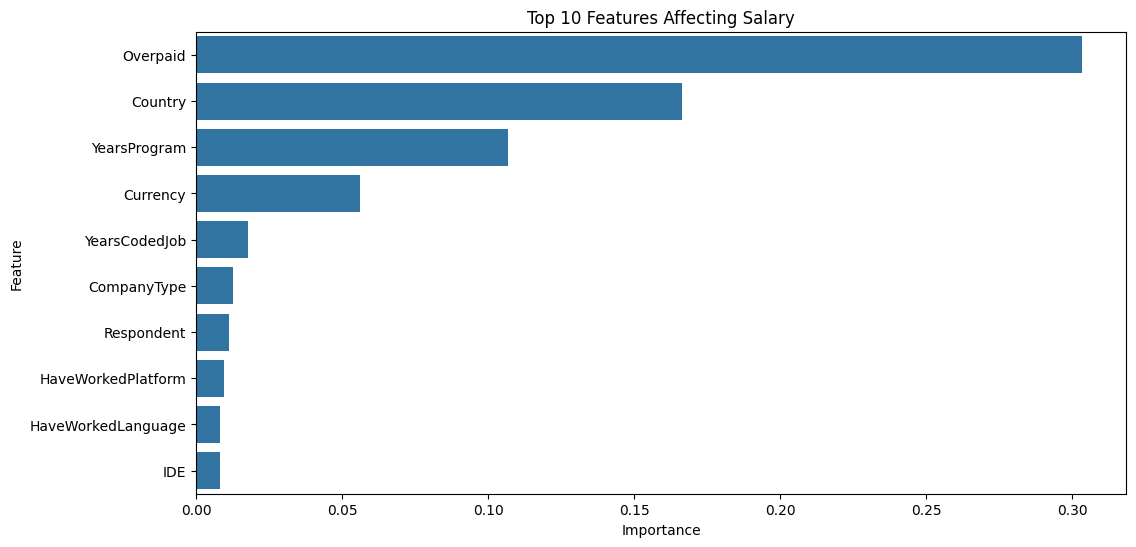

In [16]:
# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df.head(
    10)["Importance"], y=feature_importance_df.head(10)["Feature"])
plt.title("Top 10 Features Affecting Salary")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 6. Conclusions and Recommendations

## Conclusions
- **High Salaries**: Factors like years of coding experience, education level, and country significantly impact salary.
- **Regional Trends**: The United States and Western Europe dominate in demand for tech professionals.
- **Diversity**: Job satisfaction varies significantly based on gender and region, highlighting the need for inclusive practices.

## Recommendations
- For tech professionals: Invest in upskilling and certifications to boost career prospects.
- For employers: Focus on diversity and targeted hiring to improve satisfaction and retain talent.

## Next Steps
- Expand analysis to include longitudinal trends.
- Investigate deeper relationships between multiple variables (e.g., role vs. satisfaction).
